In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Internship/Titanic Dataset/Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


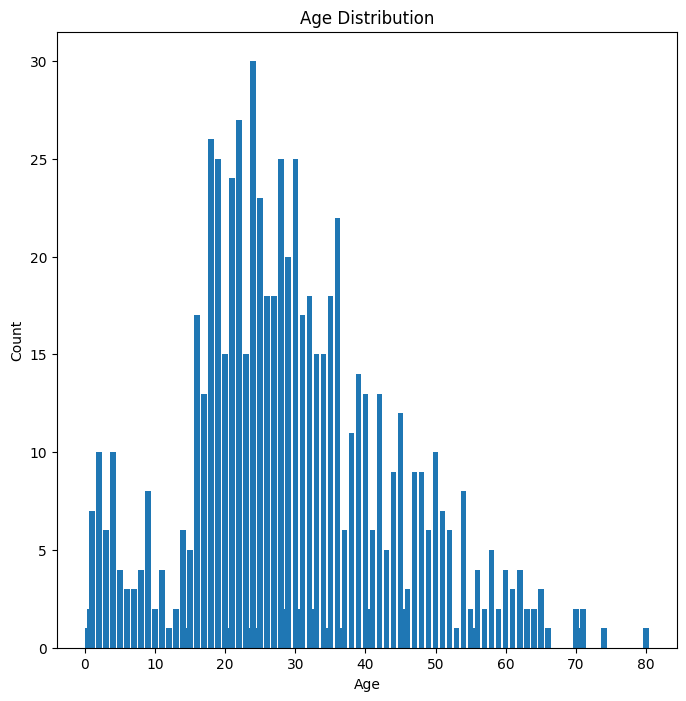

In [ ]:
plt.figure(figsize=(8,8))
x= df['Age'].value_counts()
plt.bar(x.index, x.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

 So from this we can say that the majority of peoples are age between 18 to 40.

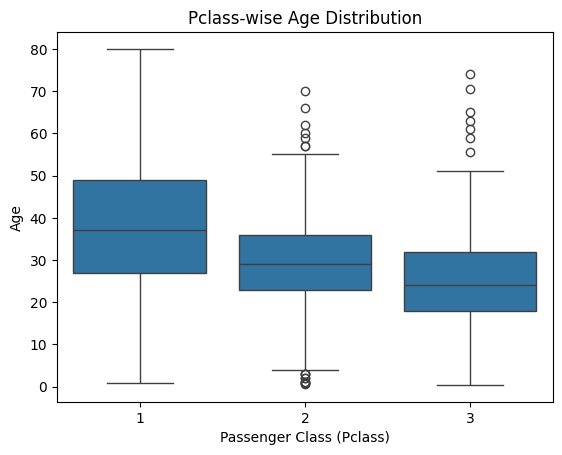

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')
plt.title('Pclass-wise Age Distribution')
plt.show()

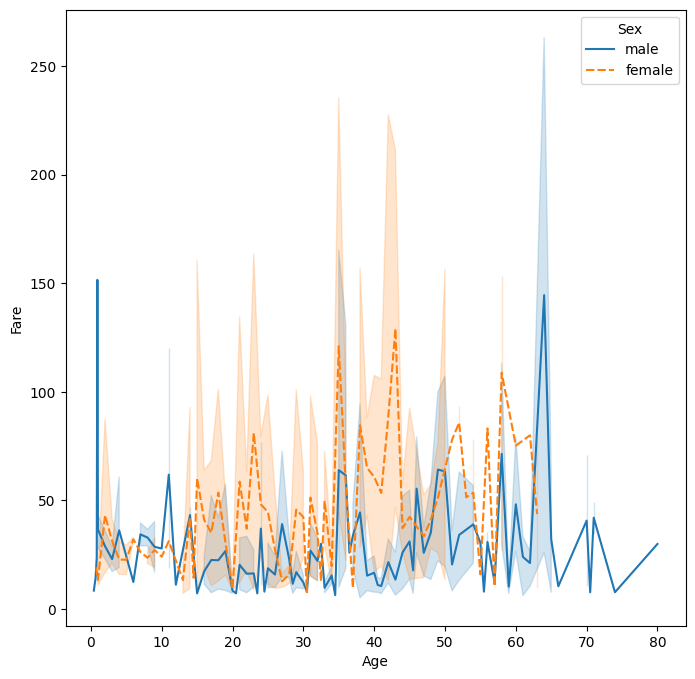

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=df)
plt.show()

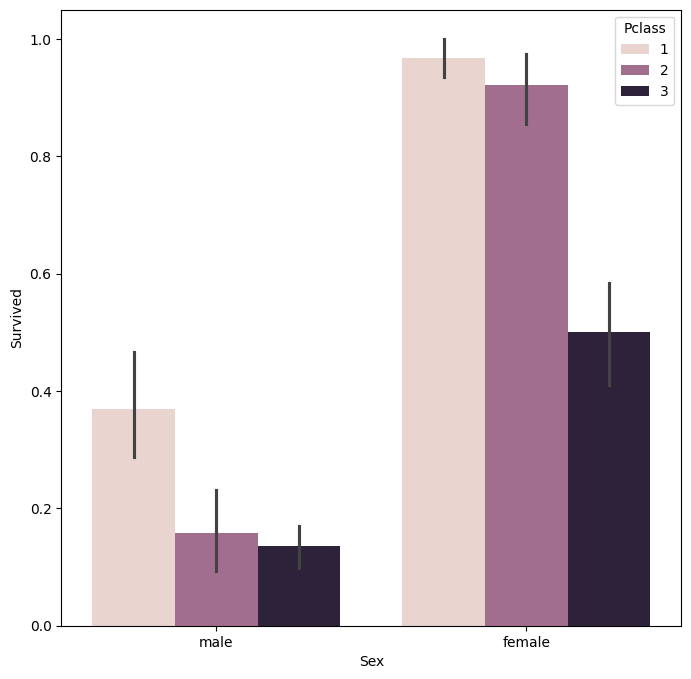

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.show()


From this plot we can assume that most of females are survived as compared to men.

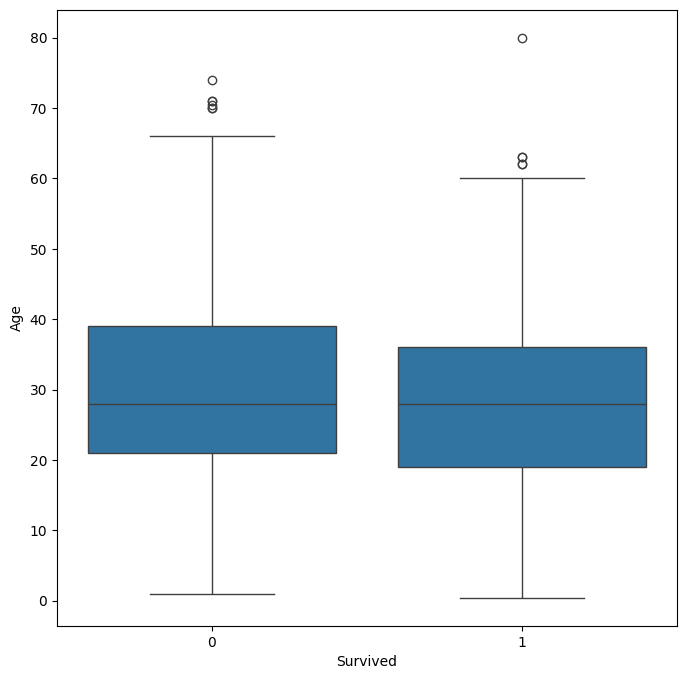

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

In [ ]:
sibling = df['SibSp'].value_counts().reset_index()
sibling

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


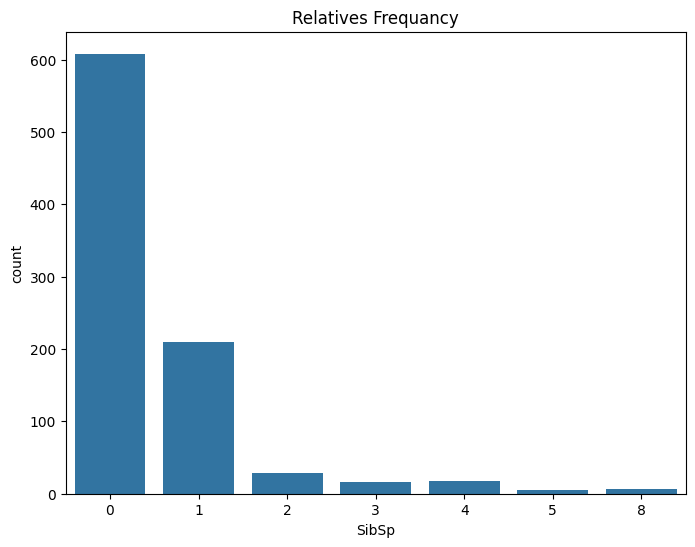

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=sibling['SibSp'], y=sibling['count'])
plt.title('Relatives Frequancy')
plt.show()

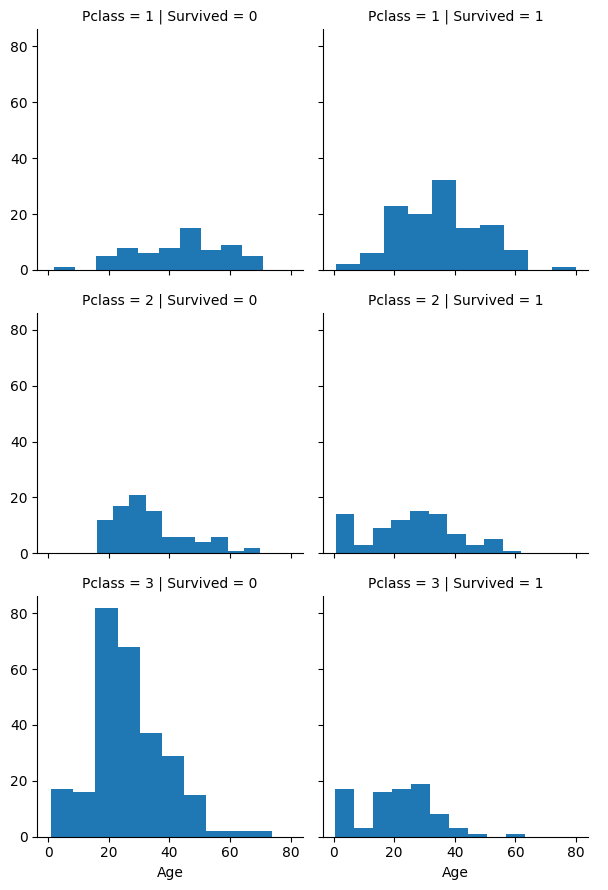

In [ ]:
plot= sns.FacetGrid(df, col='Survived', row='Pclass')

plot.map(plt.hist, 'Age')
plot.add_legend()
plt.show()

In [ ]:
df.groupby('Sex')['Age'].median().reset_index()

,Sex,Age
0,female,27.0
1,male,29.0


In [ ]:
df.groupby('Sex')['Age'].median().reset_index()

,Sex,Age
0,female,27.0
1,male,29.0


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
gender = df['Sex'].value_counts()
gender

,count
Sex,
male,577
female,314


In [ ]:
surviv_gender = df[['Survived','Sex']].value_counts().reset_index()
surviv_gender

,Survived,Sex,count
0,0,male,468
1,1,female,233
2,1,male,109
3,0,female,81


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
embark_gender = df[['Embarked','Sex']].value_counts().reset_index()
embark_gender

,Embarked,Sex,count
0,S,male,441
1,S,female,203
2,C,male,95
3,C,female,73
4,Q,male,41
5,Q,female,36


In [ ]:
survive_embark = df[['Survived','Embarked']].value_counts().reset_index()
survive_embark

,Survived,Embarked,count
0,0,S,427
1,1,S,217
2,1,C,93
3,0,C,75
4,0,Q,47
5,1,Q,30


In [ ]:
survive_class = df[['Survived','Pclass']].value_counts().reset_index()
survive_class

,Survived,Pclass,count
0,0,3,372
1,1,1,136
2,1,3,119
3,0,2,97
4,1,2,87
5,0,1,80


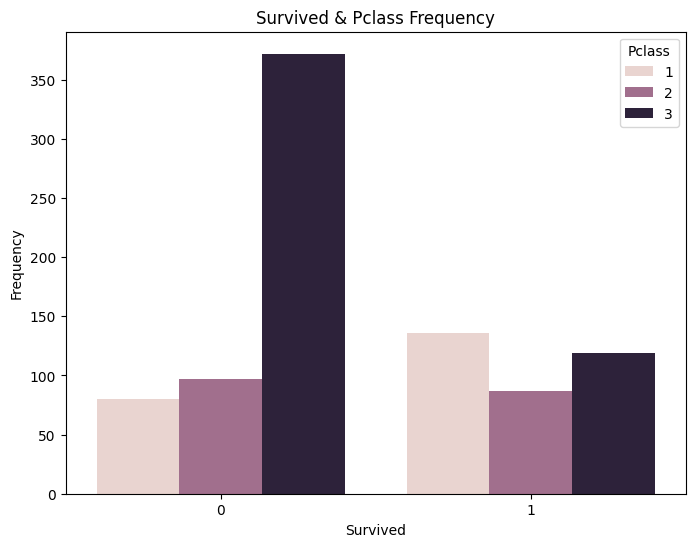

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=survive_class , x=survive_class['Survived'], y=survive_class['count'],
            hue=survive_class['Pclass'])
plt.title('Survived & Pclass Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [ ]:
surviv_relative = df[['Survived','SibSp']].value_counts().reset_index()
surviv_relative

,Survived,SibSp,count
0,0,0,398
1,1,0,210
2,1,1,112
3,0,1,97
4,0,2,15
5,0,4,15
6,1,2,13
7,0,3,12
8,0,8,7
9,0,5,5


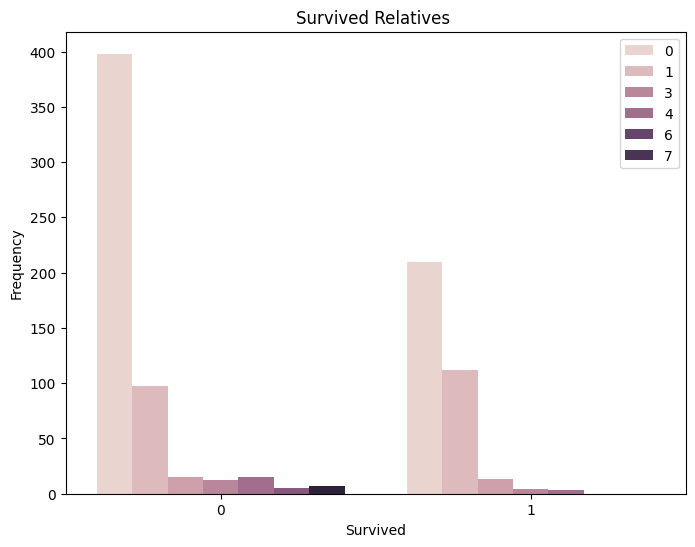

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=surviv_relative , x=surviv_relative['Survived'], y=surviv_relative['count'],
            hue=surviv_relative['SibSp'])
plt.title('Survived Relatives ')
plt.legend(loc='upper right')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df1 = df.drop(['PassengerId','Name','Ticket'], axis=1)

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df1['Sex'].replace({'male':1,'female':0},inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [ ]:
df1['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
df1['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [ ]:
df1 = pd.get_dummies(data=df1, columns=['Embarked'])
df1 = df1.astype(int)
print(df1)

     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked_C  Embarked_Q  \
0           0       3    1   22      1      0     7           0           0   
1           1       1    0   38      1      0    71           1           0   
2           1       3    0   26      0      0     7           0           0   
3           1       1    0   35      1      0    53           0           0   
4           0       3    1   35      0      0     8           0           0   
..        ...     ...  ...  ...    ...    ...   ...         ...         ...   
886         0       2    1   27      0      0    13           0           0   
887         1       1    0   19      0      0    30           0           0   
888         0       3    0   28      1      2    23           0           0   
889         1       1    1   26      0      0    30           1           0   
890         0       3    1   32      0      0     7           0           1   

     Embarked_S  
0             1  
1             0

In [ ]:
cols_to_scale = ['Pclass','Age','SibSp','Parch', 'Fare']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

Survived: [0 1]
Pclass: [1.  0.  0.5]
Sex: [1 0]
Age: [0.275  0.475  0.325  0.4375 0.35   0.675  0.025  0.3375 0.175  0.05
 0.725  0.25   0.4875 0.6875 0.3875 0.425  0.1875 0.1    0.2375 0.5
 0.825  0.525  0.2625 0.225  0.0375 0.0875 0.6125 0.3625 0.8125 0.0625
 0.1375 0.5625 0.2125 0.4    0.2    0.3125 0.     0.375  0.4125 0.2875
 0.3    0.575  0.7375 0.8875 0.4625 0.5875 0.875  0.15   0.1125 0.45
 0.6375 0.55   0.0125 0.7625 0.7    0.625  0.775  0.5125 0.65   0.7875
 0.5375 0.75   0.125  0.8    0.1625 0.6    0.6625 0.7125 1.     0.075
 0.925 ]
SibSp: [0.125 0.    0.375 0.5   0.25  0.625 1.   ]
Parch: [0.         0.16666667 0.33333333 0.83333333 0.5        0.66666667
 1.        ]
Fare: [0.01367188 0.13867188 0.10351562 0.015625   0.09960938 0.04101562
 0.02148438 0.05859375 0.03125    0.05078125 0.06054688 0.05664062
 0.02539062 0.03515625 0.06835938 0.51367188 0.05273438 0.28515625
 0.01953125 0.16015625 0.1015625  0.01757812 0.08007812 0.02929688
 0.03320312 0.07617188 0.1484375  0.

In [ ]:
df1.shape

(891, 10)

In [ ]:
df1.dtypes

,0
Survived,int64
Pclass,float64
Sex,int64
Age,float64
SibSp,float64
Parch,float64
Fare,float64
Embarked_C,int64
Embarked_Q,int64
Embarked_S,int64


In [ ]:
X = df1.drop('Survived',axis='columns')
y = df1['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(712, 9)

In [ ]:
X_test.shape

(179, 9)

In [ ]:
y_train.shape

(712,)

In [ ]:
y_test.shape

(179,)

In [ ]:
X_train[:10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
887,0.0,0,0.2375,0.000,0.000000,0.058594,0,0,1
416,0.5,0,0.4250,0.125,0.166667,0.062500,0,0,1
479,1.0,0,0.0250,0.000,0.166667,0.023438,0,0,1
134,0.5,1,0.3125,0.000,0.000000,0.025391,0,0,1
588,1.0,1,0.2750,0.000,0.000000,0.015625,0,0,1
52,0.0,0,0.6125,0.125,0.000000,0.148438,1,0,0
104,1.0,1,0.4625,0.250,0.000000,0.013672,0,0,1
3,0.0,0,0.4375,0.125,0.000000,0.103516,0,0,1
159,1.0,1,0.3500,1.000,0.333333,0.134766,0,0,1
370,0.0,1,0.3125,0.125,0.000000,0.107422,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# List of models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=5),
    "SVM": SVC(kernel='linear', random_state=5),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=5)
}

# Train, predict, and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}:\n{classification_report(y_test, y_pred)}\n")

# Display comparison
print("Model Comparison (Accuracy):")
for name, acc in results.items():
    print(f"{name}: {acc:.5f}")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       111
           1       0.79      0.66      0.72        68

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179


Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       111
           1       0.77      0.69      0.73        68

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


SVM:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       111
           1       0.76      0.66      0.71        68

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.

We find KNN have best accuracy amongs them, and then Random Forest, logistic regression and Decision Tree accordingly.